In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
incl = {}
skip = {}

for line in open("./se_bins.cov"):
    chrom, start, end, infor, _, strand, cnt = line.strip().split("\t")
    gene_id, group, symbol, key, is_use = infor.split("|")
    gene_id = gene_id + "|" + strand

    key, i = key.rsplit("_", 1)
    if group == "Inclusion" and gene_id not in incl:
        incl[gene_id] = {"up_e0":[0]*50, "up_e1":[0]*50, "down_e0":[0]*50, "down_e1":[0]*50}
    elif group == "Skip" and gene_id not in skip:
        skip[gene_id] = {"up_e0":[0]*50, "up_e1":[0]*50, "down_e0":[0]*50, "down_e1":[0]*50}
    
    if group == "Inclusion":
        incl[gene_id][key][int(i)] = int(cnt) * int(is_use)
    else:
        skip[gene_id][key][int(i)] = int(cnt) * int(is_use)

In [96]:
def compute_NormComplexity(cnt_dict):
    meta = []
    for key, val in cnt_dict.items():
        gene_id, strand = key.split("|")
        line = val["up_e0"].copy() + val["up_e1"].copy() + val["down_e0"].copy() + val["down_e1"].copy()
        if sum(line) != 0:
            line = [i/sum(line) for i in line ]
        if strand == "+":
            meta.append(line)
        else:
            meta.append(line[::-1])
    meta = np.array(meta)

    meta_final = []
    for i in range(meta.shape[1]):
        if meta[:, i].sum() == 0:
            meta_final.append(0)
        else:
            meta_final.append( meta[:, i].mean())
    return np.array(meta_final)

In [97]:
incl_meta = compute_NormComplexity(incl)
skip_meta = compute_NormComplexity(skip)

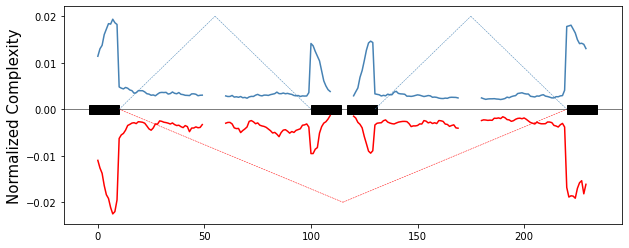

In [155]:
fig, axs = plt.subplots(1, 1, figsize=(10, 4))
axs.plot(range(0, 50), incl_meta[:50], c="steelblue")
axs.plot(range(60, 110), incl_meta[50:100], c="steelblue")
axs.plot(range(120, 170), incl_meta[100:150], c="steelblue")
axs.plot(range(180, 230), incl_meta[150:], c="steelblue")

axs.plot(range(0, 50), -skip_meta[:50], c="red")
axs.plot(range(60, 110), -skip_meta[50:100], c="red")
axs.plot(range(120, 170), -skip_meta[100:150], c="red")
axs.plot(range(180, 230), -skip_meta[150:], c="red")

rect = plt.Rectangle((-4, -0.001), 14, 0.002, edgecolor="black", facecolor="black")
axs.add_patch(rect)
rect = plt.Rectangle((100, -0.001), 14, 0.002, edgecolor="black", facecolor="black")
axs.add_patch(rect)
rect = plt.Rectangle((117, -0.001), 14, 0.002, edgecolor="black", facecolor="black")
axs.add_patch(rect)
rect = plt.Rectangle((220, -0.001), 14, 0.002, edgecolor="black", facecolor="black")
axs.add_patch(rect)

axs.plot([10, 55], [0, 0.02], ls="dashed", lw=0.5, c="steelblue")
axs.plot([55, 100], [0.02, 0], ls="dashed", lw=0.5, c="steelblue")
axs.plot([130, 175], [0, 0.02], ls="dashed", lw=0.5, c="steelblue")
axs.plot([175, 220], [0.02, 0], ls="dashed", lw=0.5, c="steelblue")

axs.plot([10, 115], [0, -0.02], ls="dashed", lw=0.5, c="red")
axs.plot([115, 220], [-0.02, 0], ls="dashed", lw=0.5, c="red")

axs.axhline(xmin=0, xmax=240, color="black", lw=0.5)
axs.set_ylabel("Normalized Complexity", size=15, )
plt.savefig("Srsf1_RNAmap.pdf")
plt.show()
plt.close()